# Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Dataset

In [2]:
master_df = pd.read_csv('E0.csv') # source: https://www.football-data.co.uk
master_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


# Arsenal VS. Man United

In [3]:
# Man United properties
mu_scored = sum(master_df.loc[master_df['AwayTeam']=='Man United', 'FTAG'].tolist())
mu_conceded = sum(master_df.loc[master_df['AwayTeam']=='Man United', 'FTHG'].tolist())
mu_matches = master_df.loc[master_df['AwayTeam']=='Man United', :].shape[0]
# Arsenal properties
ars_scored = sum(master_df.loc[master_df['HomeTeam']=='Arsenal', 'FTHG'].tolist())
ars_conceded = sum(master_df.loc[master_df['HomeTeam']=='Arsenal', 'FTAG'].tolist())
ars_matches = master_df.loc[master_df['HomeTeam']=='Arsenal', :].shape[0]
# All premier league teams properties
all_hg = sum(master_df.loc[:, 'FTHG'].tolist())
all_ag = sum(master_df.loc[:, 'FTAG'].tolist())
all_hm = master_df.loc[:, 'FTHG'].shape[0]
all_am = master_df.loc[:, 'FTAG'].shape[0]
# make df
data = {"Home Goals by All Teams":['%g'%(all_hg), all_hm, all_hg/all_hm],
       "Away Goals by All Teams":['%g'%(all_ag), all_am, all_ag/all_am],
       "Home Goals Scored by Arsenal":['%g'%(ars_scored), ars_matches, ars_scored/ars_matches],
       "Home Goals Conceded by Arsenal":['%g'%(ars_conceded), ars_matches, ars_conceded/ars_matches],
       "Away Goals Scored by Man United":['%g'%(mu_scored), mu_matches, mu_scored/mu_matches],
        "Away Goals Conceded by Man United":['%g'%(mu_conceded), mu_matches, mu_conceded/mu_matches]
       }
goal_expectancy_df = pd.DataFrame(data, index = ['Goals', 'Matches', 'Averages'])
goal_expectancy_df

,Home Goals by All Teams,Away Goals by All Teams,Home Goals Scored by Arsenal,Home Goals Conceded by Arsenal,Away Goals Scored by Man United,Away Goals Conceded by Man United
Goals,264,270,12,11,24,12
Matches,195,195,10,10,10,10
Averages,1.35385,1.38462,1.2,1.1,2.4,1.2


## Attack & Defence Strength

In [4]:
ars_att = (ars_scored/ars_matches)/(all_hg/all_hm)
mu_att = (mu_scored/mu_matches)/(all_ag/all_am)
ars_def = (ars_conceded/ars_matches)/(all_ag/all_am)
mu_def = (mu_conceded/mu_matches)/(all_hg/all_hm)
print("Arsenal Attack Strength: " + str(round(ars_att,3)) + '\n' + "Arsenal Defence Strength: " + str(round(ars_def,3)))
print("Man United Attack Strength: " + str(round(mu_att,3)) + '\n' + "Man United Defence Strength: " + str(round(mu_def,3)))

Arsenal Attack Strength: 0.886
Arsenal Defence Strength: 0.794
Man United Attack Strength: 1.733
Man United Defence Strength: 0.886


## Goal Expectancy

In [5]:
ars_gx = ars_att * mu_def * (all_hg/all_hm)
mu_gx = mu_att * ars_def * (all_ag/all_am)
print("Arsenal Goal Expectancy: "+  str(round(ars_gx,3)) + '\n' + "Man United Goal Expectancy: " + str(round(mu_gx,3)))

Arsenal Goal Expectancy: 1.064
Man United Goal Expectancy: 1.907


## Poisson Formula

In [6]:
goals = list(range(0,6))
ars_poi = []
mu_poi = []
for goal in goals:
    ars_poi.append(poisson.pmf(goal, ars_gx))
    mu_poi.append(poisson.pmf(goal, mu_gx))
prob_df = pd.DataFrame({"Goals":goals, "Arsenal Probability":ars_poi, "Man United Probability":mu_poi})
prob_df.set_index("Goals", inplace=True)
print(tabulate(prob_df, headers='keys', showindex=True, tablefmt="pretty"))

+-------+----------------------+------------------------+
| Goals | Arsenal Probability  | Man United Probability |
+-------+----------------------+------------------------+
|   0   | 0.34519825886271105  |  0.14857481146776708   |
|   1   |  0.3671654207903381  |  0.28328264053187596   |
|   2   |  0.1952652465112252  |   0.2700627839737217   |
|   3   | 0.06923040558125257  |  0.17163990270329874   |
|   4   | 0.018408994211378517 |  0.08181502028857238   |
|   5   | 0.003916095132238703 |  0.031198794403375623  |
+-------+----------------------+------------------------+


In [7]:
all_ars_prob = []
for ars_prob in ars_poi:
    for mu_prob in mu_poi:
        all_ars_prob.append(ars_prob*mu_prob)
ars_0 = all_ars_prob[0:6]
ars_1 = all_ars_prob[6:12]
ars_2 = all_ars_prob[12:18]
ars_3 = all_ars_prob[18:24]
ars_4 = all_ars_prob[24:30]
ars_5 = all_ars_prob[30:36]
# make df
goals_prob_df = pd.DataFrame({"Man United Goals":goals, "0":ars_0, "1":ars_1, "2":ars_2, "3":ars_3, "4":ars_4,
                              "5":ars_5})
goals_prob_df.set_index("Man United Goals", inplace=True)
goals_prob_df.columns.name = "Arsenal Goals"
goals_prob_df

Arsenal Goals,0,1,2,3,4,5
Man United Goals,,,,,,
0,0.051288,0.054552,0.029011,0.010286,0.002735,0.000582
1,0.097789,0.104012,0.055315,0.019612,0.005215,0.001109
2,0.093225,0.099158,0.052734,0.018697,0.004972,0.001058
3,0.059250,0.063020,0.033515,0.011883,0.003160,0.000672
4,0.028242,0.030040,0.015976,0.005664,0.001506,0.000320
5,0.010770,0.011455,0.006092,0.002160,0.000574,0.000122


In [8]:
goals_prob_np = goals_prob_df.to_numpy()
ars_win_prob = np.sum(np.triu(goals_prob_np, 1))
mu_win_prob = np.sum(np.tril(goals_prob_np, -1))
draw_prob = np.sum(np.diag(goals_prob_np))
print("Arsenal estimated chance to win: " + str(round((ars_win_prob*100),2)))
print("Man United estimated chance to win: " + str(round((mu_win_prob*100),2)))
print("Estimated chance to draw: " + str(round((draw_prob*100),2)))

Arsenal estimated chance to win: 20.73
Man United estimated chance to win: 55.69
Estimated chance to draw: 22.15


In [9]:
print("Arsenal odds to win: " + str(1/ars_win_prob))
print("Man United odds to win: " + str(1/mu_win_prob))
print("Odds to draw: " + str(1/draw_prob))

Arsenal odds to win: 4.824038116444005
Man United odds to win: 1.7955582049354397
Odds to draw: 4.513771114166787


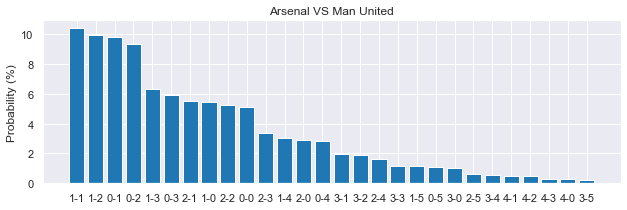

+-------------------+-----------------+-----------+--------------+--------------+
|                   | Goal Expectancy | Poisson % | Poisson Odds | Bookies Odds |
+-------------------+-----------------+-----------+--------------+--------------+
|  Arsenal (Home)   |      1.06       |   20.73   |     4.82     |     1.85     |
| Man United (Away) |      1.91       |   55.69   |     1.8      |     1.5      |
|       Draw        |        -        |   22.15   |     4.51     |     2.5      |
+-------------------+-----------------+-----------+--------------+--------------+


In [50]:
# chart
all_ars_prob_sorted = sorted(all_ars_prob, reverse=True)
ars_score = []
mu_score = []
prob_val = []
for i in all_ars_prob_sorted[0:28]:
    mu_score.append(np.array((np.where(goals_prob_df.values == i))).tolist()[0])
    ars_score.append(np.array((np.where(goals_prob_df.values == i))).tolist()[1])
    prob_val.append(i*100)
ars_score = [item for items in ars_score for item in items]
mu_score = [item for items in mu_score for item in items]
score_str = []
for i in range(0,28):
    score_str.append(str(ars_score[i]) + '-' + str(mu_score[i]))
sns.set_style("darkgrid")
plt.figure(figsize=[10.35,3])
y_pos = np.arange(len(score_str))
plt.bar(y_pos, prob_val, color='tab:blue')
plt.xticks(y_pos, score_str)
plt.ylabel('Probability (%)')
plt.title("Arsenal VS Man United")
plt.show()
# table
bookies_odds = [37/20, 6/4, 5/2] # source: https://www.telegraph.co.uk
final_df = pd.DataFrame({"Goal Expectancy":[str(round(ars_gx,2)), str(round(mu_gx,2)), '-'],
                         "Poisson %": [round(ars_win_prob*100,2), round(mu_win_prob*100,2), round(draw_prob*100,2)],
                        "Poisson Odds":[round(1/ars_win_prob,2), round(1/mu_win_prob,2), round(1/draw_prob,2)], 
                        "Bookies Odds":bookies_odds}, index=["Arsenal (Home)", "Man United (Away)", "Draw"])
print(tabulate(final_df, headers='keys', showindex=True, tablefmt="pretty"))

# References

- https://www.youtube.com/watch?v=qk00EXMKjgI&t=626s
- https://www.youtube.com/watch?v=ZZW2b84T0cw&list=LL&index=11&t=484s